### Creare e analizzare un grafo non orientato ###

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
def G(k, p):
    g = nx.Graph()
    g.add_nodes_from(range(0, k) + range(k, k+p))
    # Clique
    for i in range(0, k):
        for j in range(i + 1,k):
            g.add_edge(i, j)
    # Cycle
    for i in range(k, k + p - 1):
        g.add_edge(i, i + 1)
    g.add_edge(k + p - 1, k)    
    #Bridge
    g.add_edge(k - 1, k)
    return g

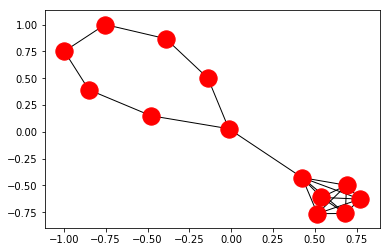

In [3]:
nx.draw_networkx(G(6,7), with_labels=False)

In [23]:
k=15
p=10
g=G(k,p)

In [24]:
# Expected k+p
print(k+p)
print(g.number_of_nodes())

25
25


In [25]:
# Expected ((k-1)*(k-1)+k+3+2*(p-1))/2 = (k^2-2k+1+k+3+2p-2)/2 = (k^2-k+2p+2)/2 
print((k*k-k+2*p+2)/2)
print(g.number_of_edges())

116
116


In [26]:
# Is cyclic
print(True)
print(nx.cycle_basis(g) != [])

True
True


In [27]:
# The path [0,1,...,k-1,0] is a simple cycle of length k (it is the longest cycle iff k>p)
print(nx.is_simple_path(g, range(k)) and nx.is_simple_path(g, [k-1, 0]))

True


In [28]:
# The path [0,1,...,k-2,k-1,k,k+1,...,k+p-1] is a simple path of length k+p
print(nx.is_simple_path(g, range(k+p)))

True


In [29]:
# There are k-1 nodes of degree k-1, 1 node of degree k, 1 node of degree 3 and p-1 nodes of degree 2
print({k-1: k-1, k: 1, 3: 1, 2: p-1})
import collections
print(collections.Counter([nx.degree(g, x) for x in nx.nodes(g)]))

{2: 9, 3: 1, 14: 14, 15: 1}
Counter({14: 14, 2: 9, 3: 1, 15: 1})


In [11]:
# If k=3, there are p+1 nodes of degree 2 and 2 nodes of degree 3
print({2: p+1, 3: 2})
print(collections.Counter([nx.degree(G(3,p),x) for x in nx.nodes(G(3,p))]))

{2: 11, 3: 2}
Counter({2: 11, 3: 2})


### Creare e analizzare un grafo orientato ###

In [12]:
def U(k):
    g = nx.DiGraph()
    girone = 1
    dimensioneGirone = 1
    while girone <= k:
        n = g.number_of_nodes()
        g.add_nodes_from(range(n + 1, n + dimensioneGirone + 1))
        for x in range(n + 1, n + dimensioneGirone + 1):
            if girone > 1:
                g.add_edge(x, int(x / 2))
                if x < n + dimensioneGirone:
                    g.add_edge(x, x + 1)
                else:
                    g.add_edge(x, n + 1)
        dimensioneGirone *= 2
        girone += 1
    return g

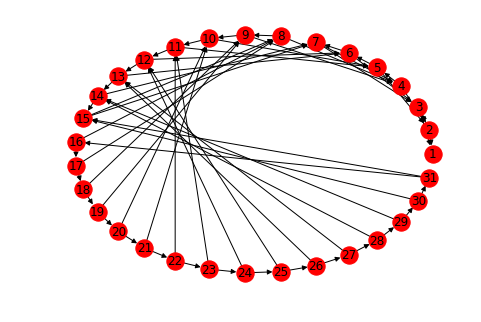

In [13]:
k = 5 
g = U(k)
pos = nx.shell_layout(g)
#print(pos)
nx.draw(g, pos, with_labels = True)

In [14]:
# U(k) has 1+2+4+8+...+2^(k-1) = 2^k-1 nodes
print(2**k-1)
print(g.number_of_nodes())

31
31


In [15]:
# Every node (except 1) has two outgoing arcs; so there are 2^(k+1)-4
print (2**(k+1)-4)
print(g.number_of_edges())

60
60


In [16]:
# One for every girone
print([range(2**t, 2**(t+1)) for t in range(k)])
print([t for t in nx.strongly_connected_components(g)])

[[1], [2, 3], [4, 5, 6, 7], [8, 9, 10, 11, 12, 13, 14, 15], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]]
[set([1]), set([2, 3]), set([4, 5, 6, 7]), set([8, 9, 10, 11, 12, 13, 14, 15]), set([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])]


In [17]:
# U(k) is weakly connected
print(1)
print(len([t for t in nx.weakly_connected_components(g)]))

1
1


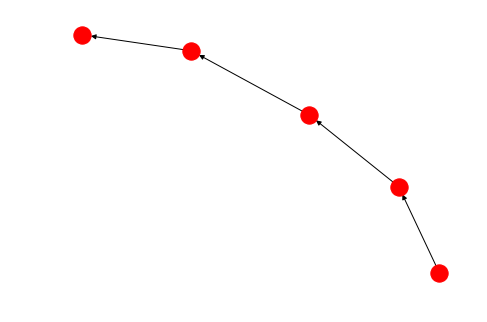

In [18]:
# The SCC DAG is a path of k nodes
nx.draw(nx.condensation(g))

In [19]:
# The path [2^(k-1),...,2^k-1,2^(k-1)] is a simple cycle of length 2^(k-1) (it is the longest cycle iff k>p)
print(nx.is_simple_path(g, range(2**(k-1),2**k)) and nx.is_simple_path(g, [2**k-1, 2**(k-1)]))

True


In [20]:
#There is a path of length g.number_of_nodes()

In [21]:
# There are 2**k-2 nodes of out-degree 2 and 1 node of out-degree 0
print({2: 2**k-2, 0: 1})
print(collections.Counter([x[1] for x in g.out_degree()]))

{0: 1, 2: 30}
Counter({2: 30, 0: 1})


In [22]:
# There are 2**(k-1) nodes of in-degree 1, 2**(k-1)-2 nodes of in-degree 3, 1 node of degree 2
print({1: 2**(k-1), 3: 2**(k-1)-2, 2: 1})
print(collections.Counter([x[1] for x in g.in_degree()]))

{1: 16, 2: 1, 3: 14}
Counter({1: 16, 3: 14, 2: 1})
